# Pymaceuticals Inc.
---

### Analysis

The study demonstrated that Capomulin effectively reduced tumor size more significantly than other treatments. Over time, its use led to a substantial decrease in tumor volume..
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path ="C:\\Users\\Christine Espiritu\\OneDrive\\Documents\\Boot Camp\\Homework\\05- Data Visualization Challenge\\Starter_Code\\Pymaceuticals\\data\Mouse_metadata.csv"
study_results_path = "C:\\Users\\Christine Espiritu\\OneDrive\\Documents\\Boot Camp\\Homework\\05- Data Visualization Challenge\\Starter_Code\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv ("C:\\Users\\Christine Espiritu\\OneDrive\\Documents\\Boot Camp\\Homework\\05- Data Visualization Challenge\\Starter_Code\\Pymaceuticals\\data\Mouse_metadata.csv")
study_results = pd.read_csv ("C:\\Users\\Christine Espiritu\\OneDrive\\Documents\\Boot Camp\\Homework\\05- Data Visualization Challenge\\Starter_Code\\Pymaceuticals\\data\\Study_results.csv")
 
# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:11: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Christine Espiritu\AppData\Local\Temp\ipykernel_10888\375562393.py:7: SyntaxWarning: invalid escape sequence '\M'
  mouse_metadata_path ="C:\\Users\\Christine Espiritu\\OneDrive\\Documents\\Boot Camp\\Homework\\05- Data Visualization Challenge\\Starter_Code\\Pymaceuticals\\data\Mouse_metadata.csv"
C:\Users\Christine Espiritu\AppData\Local\Temp\ipykernel_10888\375562393.py:11: SyntaxWarning: invalid escape sequence '\M'
  mouse_metadata = pd.read_csv ("C:\\Users\\Christine Espiritu\\OneDrive\\Documents\\Boot Camp\\Homework\\05- Data Visualization Challenge\\Starter_Code\\Pymaceuticals\\data\Mouse_metadata.csv")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice.

# Check the number of unique mice
number_of_mice = combined_data['Mouse ID'].nunique()

# Display the number of mice
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


In [49]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID' , 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_id



array(['g989'], dtype=object)

In [50]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID']=="g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping duplicates based on Mouse ID and Timepoint
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_id)== False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Check the number of mice in the cleaned DataFrame
number_of_mice = clean_data['Mouse ID'].nunique()  # Count unique Mouse IDs
print(f"Number of unique mice in the cleaned DataFrame: {number_of_mice}")

# Alternatively, you can check the total number of entries
total_entries = clean_data.shape[0]
print(f"Total number of entries in the cleaned DataFrame: {total_entries}")


Number of unique mice in the cleaned DataFrame: 248
Total number of entries in the cleaned DataFrame: 1880


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

means = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":median,
                              "Tumor Volume Variance":variance,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median", "var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

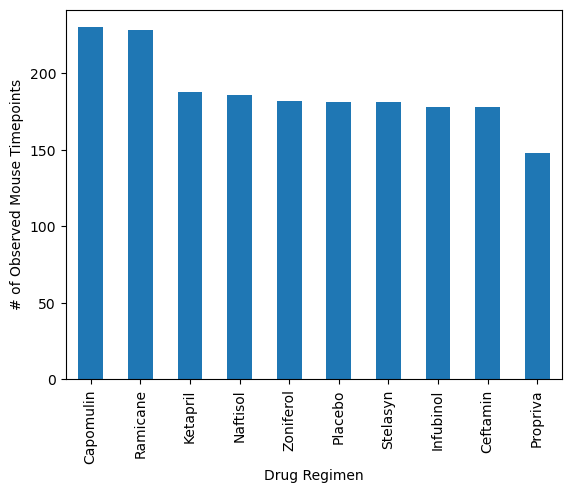

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

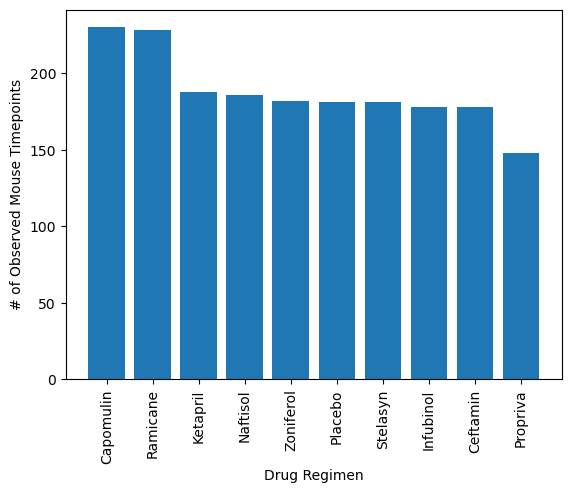

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pyplot
counts = clean_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

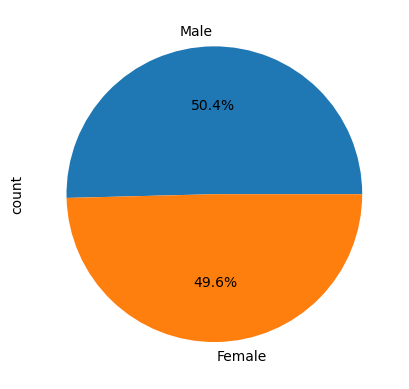

In [57]:
# Pie Chart for Total Tumor Volume using pandas
mice_df = clean_data.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
counts = mice_df.Sex.value_counts()
counts.plot(kind="pie", autopct='%1.1f%%')
plt.show()

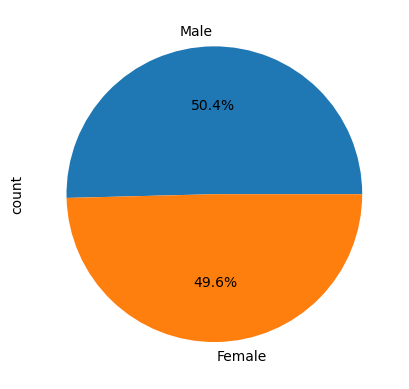

In [58]:
# Pie Chart for Total Tumor Volume using pyplot
mice_df = clean_data.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
counts = mice_df.Sex.value_counts()
plt.pie(counts.values, labels= counts.index.values,autopct='%1.1f%%')
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_data,on=['Mouse ID','Timepoint'],how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [60]:
# Put treatments into a list for the for loop 
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#create empty list
tumor_vol_list = []

#calculate the IQR
for drug in treatment_list:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]==drug,'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)

    #Determine Outliers
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol<lower_bound) | (final_tumor_vol>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [75]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


C:\Users\Christine Espiritu\AppData\Local\Temp\ipykernel_20824\2230909207.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=orange_out)


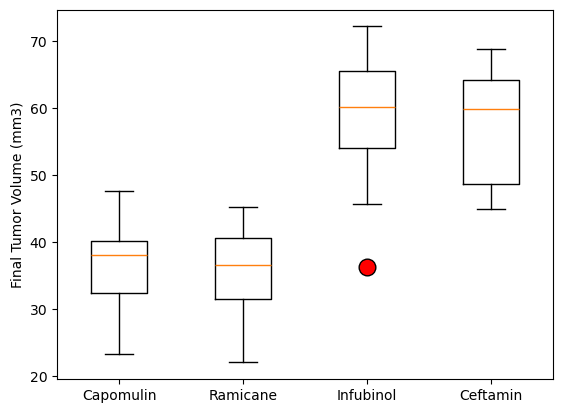

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor = 'red',markersize = 12)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

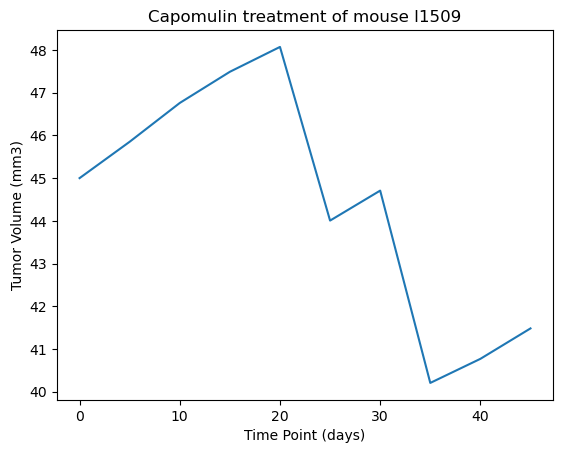

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen']=="Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']=='l509']

# Create the line plot
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])

# Set the title and labels
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l1509')

# Show the plot
plt.show()

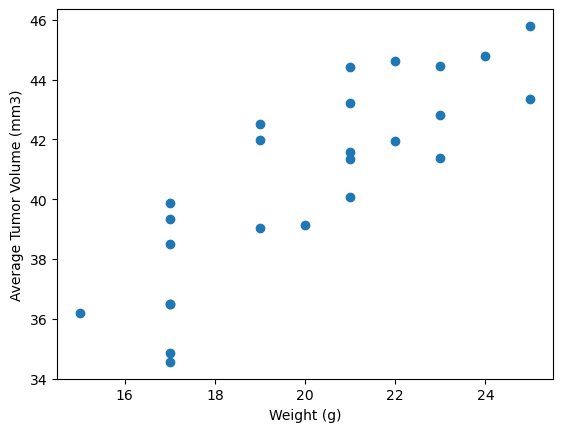

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen']== "Capomulin"]
capomulin_average = capomulin_table.groupby(["Mouse ID"]) [['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


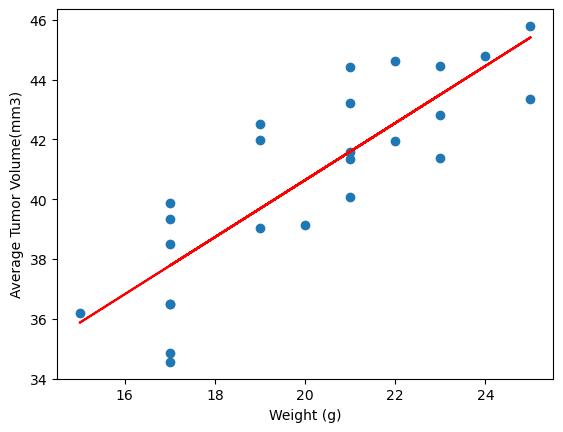

In [82]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)']) 
plt.plot(capomulin_average['Weight (g)'], y_values, color = "red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()